In [26]:
import tensorflow as tf
tf.__version__
tf.config.experimental.enable_op_determinism()
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [27]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [28]:
def plot_columns(df):
    colors = plt.cm.tab20(range(df.shape[1]))  

    for i, column in enumerate(df.columns):
        color = colors[i % 24]

        plt.figure()
        plt.plot(df.index, df[column], color=color)
        plt.xlabel('Tempo')
        plt.ylabel('Valor')
        plt.title(column)

    plt.show()

In [29]:
def plot_correlation_matrix(df):
    correlation_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix Heatmap")
    plt.show()

In [30]:
tf.keras.backend.clear_session()

In [31]:
subject = 'Tocantins - Consumo de Cimento (t)'
start_index = 0
split_index = 155
window_size = 36
train_split = split_index + 1 - 12

In [32]:
data = pd.read_csv('2003_mo_model_input_TO.csv')
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data =data.drop([' NFSP - Fluxo Mensal (Milhões de reais)'], axis=1)
data

,Unnamed: 0,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Tocantins - IDH Longevidade,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),...,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Tocantins - IDH,Tocantins - Consumo de Cimento (t)
0,2003-1,11275.335200,8.243830,0.674633,0.766370,3.576410,978.531801,1343.371397,26.858971,18.470168,...,3.656420,0.969649,0.724032,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.700107,17.555
1,2003-2,11378.766738,8.237931,0.675135,0.766735,3.573972,978.532153,1343.394931,26.860534,18.468827,...,3.654697,0.950783,0.690297,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.700487,14.976
2,2003-3,11476.693775,8.232033,0.675638,0.767100,3.572551,978.532357,1343.408659,26.861445,18.468045,...,3.654266,0.938332,0.669681,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.700866,13.334
3,2003-4,11568.023775,8.226135,0.676140,0.767465,3.572398,978.532379,1343.410130,26.861543,18.467962,...,3.653595,0.926401,0.660494,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.701246,15.173
4,2003-5,11656.641017,8.220236,0.676642,0.767830,3.576238,978.439851,1339.493279,26.838338,18.686479,...,3.650266,0.951683,0.648337,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.701626,18.728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,36946.428021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,2023-6,36910.472628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246,2023-7,36863.430304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,2023-8,36780.869880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


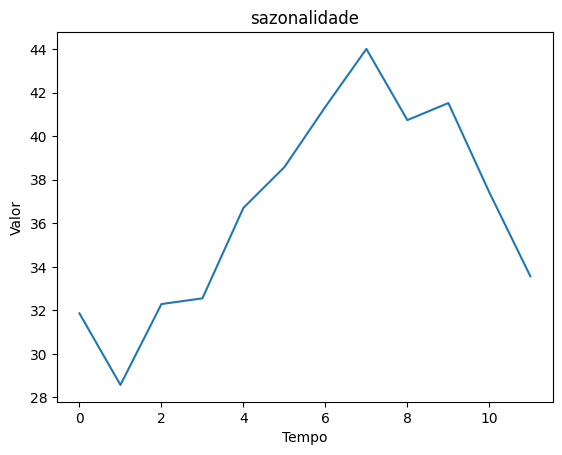

,sazonalidade
sazonalidade,
0,31.863186
1,28.576948
2,32.290540
3,32.552706
4,36.707931
5,38.579129
6,41.349052
7,44.007080
8,40.738412


In [33]:
def calculate_monthly_means(consume_of_cement, subject):
    df = pd.DataFrame({subject: consume_of_cement[:train_split]})
    df['sazonalidade'] = df.index % 12
    monthly_means = df.groupby('sazonalidade')[subject].mean()
    result_df = pd.DataFrame({'sazonalidade': monthly_means})

    return result_df

media_df = calculate_monthly_means(data[subject], subject)
plot_columns(media_df)
media_df

In [34]:
def fill_original_df_with_monthly_means(df_og, media_df):
    monthly_means = media_df['sazonalidade'].tolist()
    df_og['sazonalidade'] = [monthly_means[i % 12] for i in range(len(df_og))]
    return df_og

data = fill_original_df_with_monthly_means(data, media_df)
data = data[[col for col in data.columns if col != subject] + [subject]] #Seta consumo (target) para a coluna final
data

,Unnamed: 0,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Tocantins - IDH Longevidade,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),...,INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),População,PPC (US$),Taxa Selic (%),Tocantins - IDH,sazonalidade,Tocantins - Consumo de Cimento (t)
0,2003-1,11275.335200,8.243830,0.674633,0.766370,3.576410,978.531801,1343.371397,26.858971,18.470168,...,0.969649,0.724032,11.520143,126.459809,1.772069e+08,169.247665,1.611498,0.700107,31.863186,17.555
1,2003-2,11378.766738,8.237931,0.675135,0.766735,3.573972,978.532153,1343.394931,26.860534,18.468827,...,0.950783,0.690297,11.189862,126.581813,1.773884e+08,170.176810,1.450389,0.700487,28.576948,14.976
2,2003-3,11476.693775,8.232033,0.675638,0.767100,3.572551,978.532357,1343.408659,26.861445,18.468045,...,0.938332,0.669681,10.820792,126.703818,1.775699e+08,171.135713,1.870184,0.700866,32.290540,13.334
3,2003-4,11568.023775,8.226135,0.676140,0.767465,3.572398,978.532379,1343.410130,26.861543,18.467962,...,0.926401,0.660494,10.417840,126.825822,1.777514e+08,172.116904,1.355287,0.701246,32.552706,15.173
4,2003-5,11656.641017,8.220236,0.676642,0.767830,3.576238,978.439851,1339.493279,26.838338,18.686479,...,0.951683,0.648337,9.959690,126.976217,1.779329e+08,173.072271,1.585538,0.701626,36.707931,18.728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,2023-5,36946.428021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.707931,NaN
245,2023-6,36910.472628,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.579129,NaN
246,2023-7,36863.430304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.349052,NaN
247,2023-8,36780.869880,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.007080,NaN


In [35]:
# Shift para prever futuro e não presente
target_data = data[subject].shift(-24)
target_data

0      29.644
1      25.375
2      25.608
3      30.043
4      28.702
        ...  
244       NaN
245       NaN
246       NaN
247       NaN
248       NaN
Name: Tocantins - Consumo de Cimento (t), Length: 249, dtype: float64

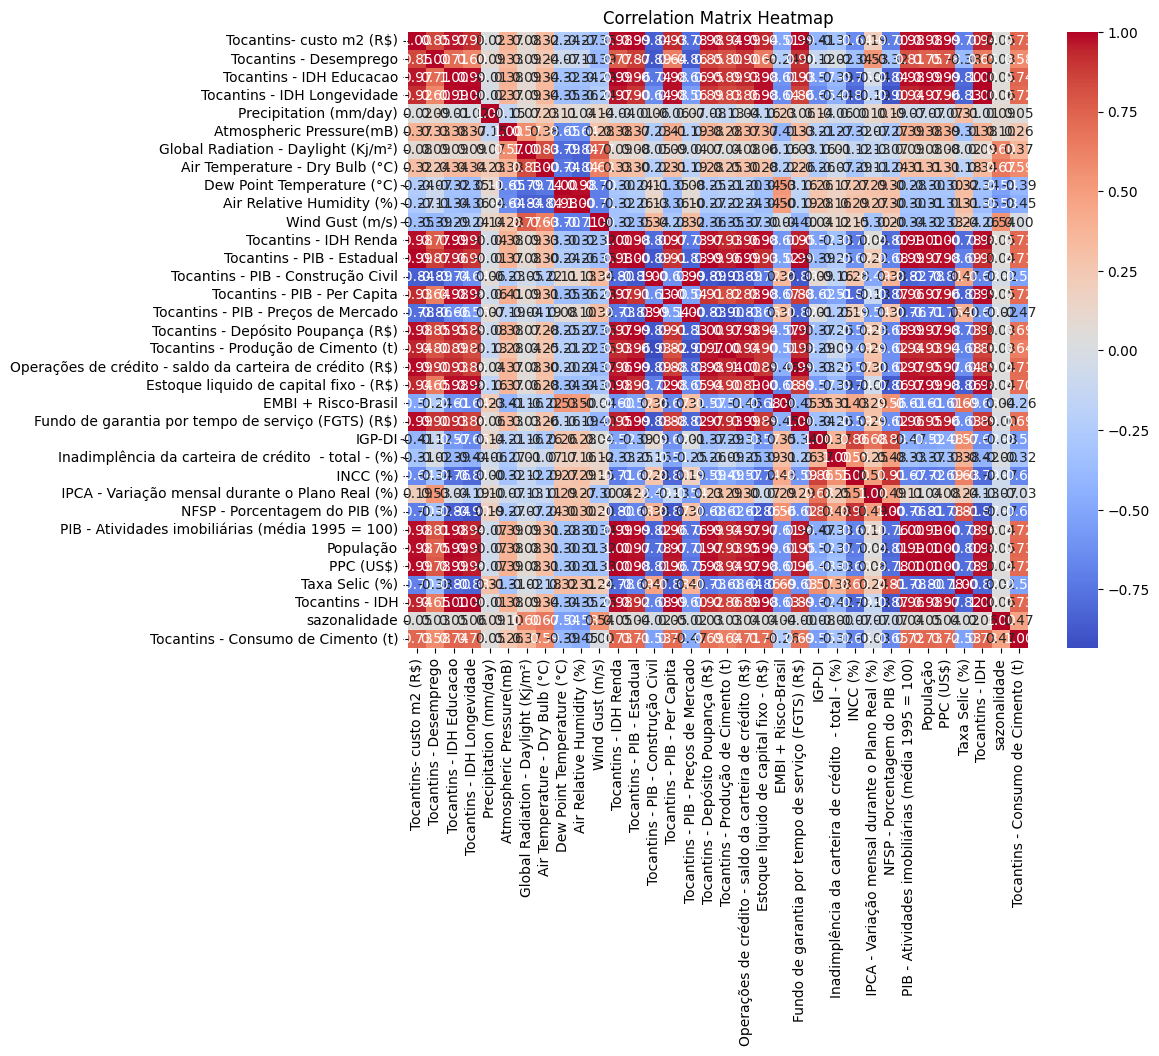

In [36]:
plot_data = data.iloc[:split_index + 1,1:]
plot_correlation_matrix(plot_data)

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

safe_data = data.iloc[:split_index + 1,1:-1]

def calculate_vif(dataframe):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = dataframe.columns
    vif_data["VIF"] = [variance_inflation_factor(dataframe.values, i) for i in range(dataframe.shape[1])]
    return vif_data

def remove_high_vif_columns(dataframe, threshold=1000):
    i=0
    while True:
        vif_result = calculate_vif(dataframe)
        high_vif_column = vif_result.loc[vif_result["VIF"].idxmax()]["Feature"]
        
        if vif_result["VIF"].max() <= threshold:
            print(f"Num columns removed: {i}")
            return dataframe
        i += 1
        dataframe = dataframe.drop(high_vif_column, axis=1)

In [38]:
safe_data = data.iloc[:split_index + 1,1:-1]
vif_info = calculate_vif(safe_data)
vif_info

,Feature,VIF
0,Tocantins- custo m2 (R$),1.150803e+06
1,Tocantins - Desemprego,3.025179e+05
2,Tocantins - IDH Educacao,9.303978e+09
3,Tocantins - IDH Longevidade,2.755565e+06
4,Precipitation (mm/day),1.364750e+02
5,Atmospheric Pressure(mB),5.563848e+07
6,Global Radiation - Daylight (Kj/m²),5.665055e+03
7,Air Temperature - Dry Bulb (°C),1.370236e+05
8,Dew Point Temperature (°C),4.147690e+04
9,Air Relative Humidity (%),4.381015e+04


In [39]:
data = remove_high_vif_columns(safe_data, 10000000)
data

Num columns removed: 7


,Tocantins- custo m2 (R$),Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),...,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%),sazonalidade
0,11275.335200,8.243830,0.674633,3.576410,978.531801,1343.371397,26.858971,18.470168,64.274735,1.922279,...,2.097001e+06,1.036534,3.656420,0.969649,0.724032,11.520143,126.459809,169.247665,1.611498,31.863186
1,11378.766738,8.237931,0.675135,3.573972,978.532153,1343.394931,26.860534,18.468827,64.266609,1.922184,...,2.000523e+06,0.993449,3.654697,0.950783,0.690297,11.189862,126.581813,170.176810,1.450389,28.576948
2,11476.693775,8.232033,0.675638,3.572551,978.532357,1343.408659,26.861445,18.468045,64.261870,1.922064,...,1.963278e+06,0.973020,3.654266,0.938332,0.669681,10.820792,126.703818,171.135713,1.870184,32.290540
3,11568.023775,8.226135,0.676140,3.572398,978.532379,1343.410130,26.861543,18.467962,64.261362,1.921914,...,1.954187e+06,0.940489,3.653595,0.926401,0.660494,10.417840,126.825822,172.116904,1.355287,32.552706
4,11656.641017,8.220236,0.676642,3.576238,978.439851,1339.493279,26.838338,18.686479,65.145668,1.897554,...,1.975493e+06,0.917493,3.650266,0.951683,0.648337,9.959690,126.976217,173.072271,1.585538,36.707931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,22748.972104,10.437886,0.723898,3.952465,978.973041,1373.393330,29.567894,16.220985,49.621986,1.691400,...,9.124085e+06,0.471500,3.103302,0.501878,0.527374,2.438647,192.698092,390.589413,1.078474,44.007080
152,22856.946618,10.428857,0.725052,4.792155,978.561120,1377.386489,29.556910,17.381618,53.487221,1.700337,...,9.111628e+06,0.475422,3.177535,0.489257,0.525404,2.375528,192.754385,391.798431,0.962516,40.738412
153,22964.863361,10.419827,0.726206,8.334514,978.537265,1357.096200,28.781084,18.504974,60.215632,1.764904,...,9.630300e+06,0.447600,3.254167,0.489071,0.522000,2.307250,192.810678,393.032398,1.138989,41.521580
154,23077.592976,10.410798,0.727361,7.492242,978.475363,1374.279421,28.755460,19.110685,62.103939,1.800157,...,1.020613e+07,0.426394,3.330340,0.486059,0.509714,2.242645,192.715004,394.326420,1.038436,37.414169


In [40]:
input_data = data.iloc[:split_index + 1,1:-1]
mean = np.mean(input_data, axis=0)
stddev =  np.std(input_data, axis=0)
input_data = ((input_data - mean) /stddev)
input_data

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Construção Civil,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
0,-0.527613,-2.107611,0.509282,0.018473,0.063424,-0.319486,-0.101145,-0.030384,0.989904,0.429631,...,-0.510608,-1.245444,3.807189,1.508986,3.557039,2.744724,4.007134,-1.745295,-1.737578,2.007617
1,-0.533882,-2.069973,0.506454,0.018943,0.063734,-0.317570,-0.101769,-0.031276,0.989554,0.442539,...,-0.710802,-1.285329,3.466444,1.502979,3.362807,2.328463,3.841816,-1.739636,-1.724415,1.464013
2,-0.540151,-2.032334,0.504805,0.019217,0.063915,-0.316453,-0.102132,-0.031796,0.989116,0.455447,...,-0.544025,-1.300726,3.304873,1.501477,3.234624,2.074077,3.657082,-1.733978,-1.710831,2.880457
3,-0.546420,-1.994696,0.504628,0.019247,0.063935,-0.316333,-0.102171,-0.031852,0.988569,0.468356,...,-0.101360,-1.304485,3.047593,1.499141,3.111793,1.960720,3.455390,-1.728320,-1.696931,1.143128
4,-0.552689,-1.957058,0.509084,-0.104606,0.012256,-0.344782,-0.000522,0.065234,0.899739,0.481264,...,0.484338,-1.295677,2.865728,1.487539,3.372081,1.810716,3.226068,-1.721344,-1.683397,1.920025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,1.804361,1.583778,0.945644,0.609084,0.459531,3.001715,-1.147420,-1.639069,0.147966,-1.242613,...,0.414233,1.659621,-0.661498,-0.418507,-1.258759,0.318154,-0.538499,1.326731,1.398025,0.209123
152,1.794765,1.670255,1.919990,0.057716,0.512216,2.988248,-0.607517,-1.214715,0.180557,-1.237706,...,0.494098,1.654471,-0.630482,-0.159821,-1.388696,0.293838,-0.570093,1.329342,1.415152,-0.182135
153,1.785168,1.756732,6.030419,0.025786,0.244508,2.037068,-0.084954,-0.476021,0.416010,-1.232799,...,0.584174,1.868895,-0.850517,0.107226,-1.390613,0.251845,-0.604269,1.331953,1.432633,0.413308
154,1.775571,1.843209,5.053076,-0.057072,0.471222,2.005653,0.196811,-0.268709,0.544567,-1.227892,...,0.646687,2.106951,-1.018234,0.372672,-1.421626,0.100243,-0.636606,1.327515,1.450965,0.074029


In [41]:
# input para treinamento
train_input = input_data.iloc[start_index:train_split]
train_input

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Construção Civil,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
0,-0.527613,-2.107611,0.509282,0.018473,0.063424,-0.319486,-0.101145,-0.030384,0.989904,0.429631,...,-0.510608,-1.245444,3.807189,1.508986,3.557039,2.744724,4.007134,-1.745295,-1.737578,2.007617
1,-0.533882,-2.069973,0.506454,0.018943,0.063734,-0.317570,-0.101769,-0.031276,0.989554,0.442539,...,-0.710802,-1.285329,3.466444,1.502979,3.362807,2.328463,3.841816,-1.739636,-1.724415,1.464013
2,-0.540151,-2.032334,0.504805,0.019217,0.063915,-0.316453,-0.102132,-0.031796,0.989116,0.455447,...,-0.544025,-1.300726,3.304873,1.501477,3.234624,2.074077,3.657082,-1.733978,-1.710831,2.880457
3,-0.546420,-1.994696,0.504628,0.019247,0.063935,-0.316333,-0.102171,-0.031852,0.988569,0.468356,...,-0.101360,-1.304485,3.047593,1.499141,3.111793,1.960720,3.455390,-1.728320,-1.696931,1.143128
4,-0.552689,-1.957058,0.509084,-0.104606,0.012256,-0.344782,-0.000522,0.065234,0.899739,0.481264,...,0.484338,-1.295677,2.865728,1.487539,3.372081,1.810716,3.226068,-1.721344,-1.683397,1.920025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.735095,1.010094,0.295158,0.925733,1.433775,1.205881,-0.722595,-0.894423,-0.297144,-1.292757,...,-0.364905,1.409149,0.519146,-0.961354,-0.690123,1.744343,-0.357756,1.345611,1.245801,-0.282621
140,1.762384,1.003763,0.481026,0.428047,0.846372,0.904132,-0.203592,-0.406250,-0.670083,-1.289599,...,-0.347187,1.422197,0.540645,-1.047598,-0.646253,1.739673,-0.353467,1.346023,1.254608,-0.612121
141,1.789672,0.997432,0.273864,0.277117,0.373417,0.372604,0.209098,0.075199,-0.941144,-1.286440,...,-0.321619,1.608476,0.589758,-1.189483,-0.641003,1.698689,-0.355172,1.346436,1.263636,-0.137902
142,1.816961,0.991101,-0.158122,0.220819,-0.218849,-0.231060,0.627446,0.576174,-1.267987,-1.283282,...,-0.287493,1.830253,0.536404,-1.332682,-0.650191,1.675167,-0.359681,1.337260,1.272935,-0.332143


In [42]:
# Alvo para treinamento
train_target = target_data.iloc[start_index:train_split]
train_target

0      29.644000
1      25.375000
2      25.608000
3      30.043000
4      28.702000
         ...    
139    56.317628
140    52.928633
141    54.152592
142    48.782752
143    45.186500
Name: Tocantins - Consumo de Cimento (t), Length: 144, dtype: float64

In [43]:
def create_batches(t_input, t_target, window_size, start_from):
    
    X_batches = []
    y_batches = []

    train_input_values = t_input.values 

    for i in range(len(t_input) - window_size):
        
        X_window = train_input_values[i:i+window_size, :]
        y_target = t_target[start_from+i+window_size]

        X_batches.append(X_window)
        y_batches.append(y_target)

    return np.array(X_batches), np.array(y_batches)

In [44]:
reshaped_train, reshaped_target = create_batches(train_input, 
                                                 train_target, 
                                                 window_size, 
                                                 start_index)
reshaped_train.shape

(108, 36, 24)

In [45]:
# input para treinamento
test_input = input_data.iloc[train_split - window_size:split_index + 1]
test_input

,Tocantins - Desemprego,Tocantins - IDH Educacao,Precipitation (mm/day),Atmospheric Pressure(mB),Global Radiation - Daylight (Kj/m²),Air Temperature - Dry Bulb (°C),Dew Point Temperature (°C),Air Relative Humidity (%),Wind Gust (m/s),Tocantins - PIB - Construção Civil,...,EMBI + Risco-Brasil,Fundo de garantia por tempo de serviço (FGTS) (R$),IGP-DI,Inadimplência da carteira de crédito - total - (%),INCC (%),IPCA - Variação mensal durante o Plano Real (%),NFSP - Porcentagem do PIB (%),PIB - Atividades imobiliárias (média 1995 = 100),PPC (US$),Taxa Selic (%)
108,0.686353,0.681612,-0.752106,-0.694180,-1.709018,-1.586836,0.578889,0.909376,-1.252225,-1.127371,...,-0.758140,0.735654,-0.150121,1.452528,-0.134638,-0.348558,-0.712725,0.693264,0.812014,-1.082183
109,0.725049,0.700271,-0.681534,-0.534568,-1.217244,-1.327505,0.579768,0.795644,-1.424516,-1.146665,...,-0.744935,0.632719,-0.064049,1.577437,-0.250541,-0.314756,-0.707406,0.732176,0.831569,-1.036767
110,0.763746,0.718929,-0.850356,-0.044544,-0.916448,-1.056321,0.461057,0.600286,-1.570183,-1.165959,...,-0.743509,0.633437,0.165323,1.665230,-0.253852,-0.193331,-0.699231,0.771088,0.850791,-0.752482
111,0.802443,0.737587,-0.837377,0.417897,-0.143843,-0.705879,-0.064843,0.071934,-1.317912,-1.185253,...,-0.748471,0.610450,0.155491,1.735648,-0.175858,-0.069191,-0.693507,0.810000,0.868783,-1.088413
112,0.841139,0.756246,-0.985193,1.185899,0.555347,-0.234348,-0.904892,-0.681141,-0.292451,-1.204547,...,-0.764308,0.631167,-0.075593,1.739412,0.099226,-0.104407,-0.679000,0.850727,0.886720,-1.508135
113,0.879836,0.774904,-1.149061,1.466742,1.047215,0.564977,-1.617706,-1.375288,0.284539,-1.223841,...,-0.786416,0.659533,-0.323610,1.747279,-0.153882,-0.083975,-0.662783,0.891455,0.905151,-1.474280
114,0.918532,0.793562,-1.106909,1.521179,1.662106,1.858854,-2.050463,-1.989414,1.343734,-1.243135,...,-0.808518,0.667761,-0.525659,1.756575,-0.146871,-0.089130,-0.650682,0.932183,0.923702,-1.463452
115,0.957229,0.812221,-1.083510,1.144257,1.374855,2.126937,-1.826247,-1.877207,1.525823,-1.262429,...,-0.838953,0.689072,-0.771574,1.787886,-0.265940,-0.124447,-0.648019,0.969967,0.942382,-1.236037
116,0.995925,0.830879,-1.034630,0.410265,1.132950,2.189315,-1.221660,-1.459969,0.870763,-1.281723,...,-0.869366,0.684945,-0.995926,1.740250,-0.285762,-0.077195,-0.640313,1.007752,0.960385,-0.935721
117,1.034622,0.849538,-0.969080,0.127974,0.653878,1.666077,-0.521441,-0.830047,0.455709,-1.301017,...,-0.900682,0.852584,-1.066619,1.618503,-0.293773,-0.110139,-0.639749,1.045536,0.977769,-1.241995


In [46]:
reshaped_test, reshaped_test_target = create_batches(test_input, 
                                                     target_data, 
                                                     window_size, 
                                                     train_split - window_size)
reshaped_test.shape 

(12, 36, 24)

In [47]:
def validation_splitter(arr, div_factor, add_factor=0):
    split_factor = len(arr) // div_factor
    positions_to_drop_index = []
    positions_to_drop = []
    for i in range(split_factor):
        pos = len(arr) - (i * div_factor + 1)
        positions_to_drop_index.append(pos)
        positions_to_drop.append(pos + add_factor)
    
    arr_droped = arr[positions_to_drop]
    arr_result = np.delete(arr, positions_to_drop_index, axis=0)
    
    return arr_result, arr_droped

In [48]:
# Rede Neural Recorrente com optmizador Estocástico
def lstm_model(train_input, train_target, want_verbose=1, seed=0):
    if seed != 0:
        random.seed(seed)
        np.random.seed(seed)
        tf.random.set_seed(seed)
    # Aṕos 500 epochs sem grandes melhoras no val_loss, interrompe.
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                      patience=500, 
                                                      verbose=want_verbose, 
                                                      restore_best_weights=True,
                                                      start_from_epoch=500)
    # Método estocástico e learning rate=0.005
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.005)
    model = tf.keras.Sequential([
        tf.keras.layers.LSTM(36, activation='tanh', 
                            return_sequences=True, 
                            kernel_regularizer=tf.keras.regularizers.l2(0.01),  
                            input_shape=(reshaped_train.shape[1], reshaped_train.shape[2])),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.LSTM(144, activation='tanh', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)
    ])
    model.compile(optimizer=optimizer,
                  loss='mean_squared_error')    
    history = model.fit(train_input, 
                        train_target, 
                        epochs=10000,
                        validation_split=0.07,
                        callbacks=[early_stopping], 
                        verbose=want_verbose)
    return model, history

In [49]:
def get_a_good_seed(train_input, train_target, test_input, test_target):

    random_seeds = [random.randint(0, 2**32 - 1) for _ in range(10)]
    print(random_seeds)

    best_loss = float('inf')
    winner_seed = None
    i = 0
    for seed in random_seeds:
        print(f"\n\nStep: {i} ___________________________________________")
        i += 1

        model, history = lstm_model(train_input, train_target, want_verbose=0, seed=seed)
        current_loss = min(history.history['val_loss'][500:])
        print(f"val_loss: {current_loss}")

        if current_loss < best_loss:
            best_loss = current_loss
            winner_seed = seed
            print(f"winner_seed: {winner_seed}")
            if winner_seed == 0.0:
                return winner_seed

    return winner_seed

In [50]:
winner_seed = get_a_good_seed(reshaped_train, reshaped_target, reshaped_test, reshaped_test_target)
print(f"\n\nfinal_seed: {winner_seed}")

[850799920, 4169487841, 3843481425, 1494555468, 2275482039, 1243378848, 1927440676, 630190056, 369745109, 1522664797]


Step: 0 ___________________________________________
val_loss: 15.576351165771484
winner_seed: 850799920


Step: 1 ___________________________________________
val_loss: 8.472918510437012
winner_seed: 4169487841


Step: 2 ___________________________________________
val_loss: 9.086809158325195


Step: 3 ___________________________________________
val_loss: 13.793704986572266


Step: 4 ___________________________________________
val_loss: 10.57043743133545


Step: 5 ___________________________________________
val_loss: 10.968995094299316


Step: 6 ___________________________________________
val_loss: 10.374656677246094


Step: 7 ___________________________________________
val_loss: 8.701741218566895


Step: 8 ___________________________________________
val_loss: 7.940595626831055
winner_seed: 369745109


Step: 9 ___________________________________________
val_loss: 6.9879

In [51]:
trained_model, history = lstm_model(reshaped_train, 
                                    reshaped_target, 
                                    want_verbose=1, 
                                    seed=winner_seed)

Epoch 1/10000
4/4 [==============================] - 2s 125ms/step - loss: 1579.6227 - val_loss: 234.3017
Epoch 2/10000
4/4 [==============================] - 0s 11ms/step - loss: 69.6122 - val_loss: 325.2731
Epoch 3/10000
4/4 [==============================] - 0s 12ms/step - loss: 68.4118 - val_loss: 140.7754
Epoch 4/10000
4/4 [==============================] - 0s 12ms/step - loss: 47.4951 - val_loss: 19.2473
Epoch 5/10000
4/4 [==============================] - 0s 11ms/step - loss: 57.7343 - val_loss: 60.6430
Epoch 6/10000
4/4 [==============================] - 0s 11ms/step - loss: 44.7566 - val_loss: 33.1318
Epoch 7/10000
4/4 [==============================] - 0s 11ms/step - loss: 41.9188 - val_loss: 16.8902
Epoch 8/10000
4/4 [==============================] - 0s 11ms/step - loss: 40.5850 - val_loss: 32.5675
Epoch 9/10000
4/4 [==============================] - 0s 11ms/step - loss: 44.9439 - val_loss: 13.5676
Epoch 10/10000
4/4 [==============================] - 0s 11ms/step - loss: 4

Epoch 81/10000
4/4 [==============================] - 0s 11ms/step - loss: 12.9660 - val_loss: 14.3960
Epoch 82/10000
4/4 [==============================] - 0s 12ms/step - loss: 18.4410 - val_loss: 7.8809
Epoch 83/10000
4/4 [==============================] - 0s 11ms/step - loss: 13.2973 - val_loss: 12.2216
Epoch 84/10000
4/4 [==============================] - 0s 11ms/step - loss: 15.2011 - val_loss: 10.1274
Epoch 85/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.7952 - val_loss: 8.6866
Epoch 86/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.0783 - val_loss: 12.7090
Epoch 87/10000
4/4 [==============================] - 0s 11ms/step - loss: 14.4498 - val_loss: 8.4229
Epoch 88/10000
4/4 [==============================] - 0s 10ms/step - loss: 14.1488 - val_loss: 20.3222
Epoch 89/10000
4/4 [==============================] - 0s 11ms/step - loss: 15.5593 - val_loss: 11.6287
Epoch 90/10000
4/4 [==============================] - 0s 10ms/step - loss: 1

4/4 [==============================] - 0s 11ms/step - loss: 10.8029 - val_loss: 17.4917
Epoch 161/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.4924 - val_loss: 16.5649
Epoch 162/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.6408 - val_loss: 12.1270
Epoch 163/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.2716 - val_loss: 10.1355
Epoch 164/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.0668 - val_loss: 10.8110
Epoch 165/10000
4/4 [==============================] - 0s 11ms/step - loss: 10.2577 - val_loss: 14.9388
Epoch 166/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.3261 - val_loss: 10.8887
Epoch 167/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.6785 - val_loss: 15.4595
Epoch 168/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.3665 - val_loss: 12.4692
Epoch 169/10000
4/4 [==============================] - 0s 11ms/step - loss: 13.852

4/4 [==============================] - 0s 13ms/step - loss: 9.8210 - val_loss: 15.7935
Epoch 240/10000
4/4 [==============================] - 0s 12ms/step - loss: 9.2002 - val_loss: 22.6219
Epoch 241/10000
4/4 [==============================] - 0s 12ms/step - loss: 8.0137 - val_loss: 11.8573
Epoch 242/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.8406 - val_loss: 8.8575
Epoch 243/10000
4/4 [==============================] - 0s 11ms/step - loss: 11.5628 - val_loss: 14.5116
Epoch 244/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.9624 - val_loss: 11.2253
Epoch 245/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.8260 - val_loss: 38.3197
Epoch 246/10000
4/4 [==============================] - 0s 10ms/step - loss: 13.2940 - val_loss: 16.3877
Epoch 247/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.8071 - val_loss: 6.6443
Epoch 248/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.4408 - val

4/4 [==============================] - 0s 10ms/step - loss: 9.3684 - val_loss: 16.8434
Epoch 319/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8156 - val_loss: 12.8919
Epoch 320/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.6555 - val_loss: 13.7759
Epoch 321/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.4294 - val_loss: 16.1910
Epoch 322/10000
4/4 [==============================] - 0s 10ms/step - loss: 9.7820 - val_loss: 9.0850
Epoch 323/10000
4/4 [==============================] - 0s 10ms/step - loss: 13.0713 - val_loss: 23.4460
Epoch 324/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1059 - val_loss: 16.1677
Epoch 325/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1222 - val_loss: 18.0140
Epoch 326/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.4005 - val_loss: 13.7990
Epoch 327/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3783 - val_

4/4 [==============================] - 0s 11ms/step - loss: 7.0351 - val_loss: 26.5280
Epoch 398/10000
4/4 [==============================] - 0s 11ms/step - loss: 9.4761 - val_loss: 15.1446
Epoch 399/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.7823 - val_loss: 9.0683
Epoch 400/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.7086 - val_loss: 18.2647
Epoch 401/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.8094 - val_loss: 28.5373
Epoch 402/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.3246 - val_loss: 12.6649
Epoch 403/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.3298 - val_loss: 5.9398
Epoch 404/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8449 - val_loss: 11.8398
Epoch 405/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5409 - val_loss: 13.3832
Epoch 406/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.9409 - val_

4/4 [==============================] - 0s 10ms/step - loss: 10.1022 - val_loss: 36.2100
Epoch 477/10000
4/4 [==============================] - 0s 10ms/step - loss: 10.2262 - val_loss: 26.6137
Epoch 478/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.3675 - val_loss: 33.9940
Epoch 479/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.4539 - val_loss: 15.8696
Epoch 480/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.3842 - val_loss: 27.7328
Epoch 481/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.5727 - val_loss: 11.2427
Epoch 482/10000
4/4 [==============================] - 0s 12ms/step - loss: 11.0492 - val_loss: 35.2977
Epoch 483/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8486 - val_loss: 24.7884
Epoch 484/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.8959 - val_loss: 13.7864
Epoch 485/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.2513 - v

4/4 [==============================] - 0s 9ms/step - loss: 8.1797 - val_loss: 12.9799
Epoch 556/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.6330 - val_loss: 24.0463
Epoch 557/10000
4/4 [==============================] - 0s 12ms/step - loss: 7.0179 - val_loss: 13.8981
Epoch 558/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.7107 - val_loss: 35.4045
Epoch 559/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.2941 - val_loss: 10.6652
Epoch 560/10000
4/4 [==============================] - 0s 10ms/step - loss: 11.5949 - val_loss: 24.6209
Epoch 561/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.8208 - val_loss: 19.0557
Epoch 562/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.1876 - val_loss: 14.4134
Epoch 563/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9105 - val_loss: 14.8548
Epoch 564/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.2119 - val_

4/4 [==============================] - 0s 10ms/step - loss: 7.9803 - val_loss: 11.4514
Epoch 635/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.7016 - val_loss: 15.7308
Epoch 636/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.5798 - val_loss: 21.2416
Epoch 637/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6336 - val_loss: 33.9339
Epoch 638/10000
4/4 [==============================] - 0s 9ms/step - loss: 9.1544 - val_loss: 16.4891
Epoch 639/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.3109 - val_loss: 16.4531
Epoch 640/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.1313 - val_loss: 18.8616
Epoch 641/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.2009 - val_loss: 20.7879
Epoch 642/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.5984 - val_loss: 14.9153
Epoch 643/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.9062 - val_los

Epoch 714/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.9148 - val_loss: 12.7670
Epoch 715/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.2667 - val_loss: 22.2393
Epoch 716/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.8683 - val_loss: 25.6785
Epoch 717/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.1735 - val_loss: 22.1701
Epoch 718/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.4624 - val_loss: 37.0566
Epoch 719/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1273 - val_loss: 55.5154
Epoch 720/10000
4/4 [==============================] - 0s 9ms/step - loss: 10.3971 - val_loss: 24.9028
Epoch 721/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.8951 - val_loss: 17.4850
Epoch 722/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.7687 - val_loss: 22.3128
Epoch 723/10000
4/4 [==============================] - 0s 10ms/step - loss

4/4 [==============================] - 0s 11ms/step - loss: 7.9185 - val_loss: 12.1793
Epoch 794/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.9081 - val_loss: 18.9011
Epoch 795/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.6636 - val_loss: 15.6013
Epoch 796/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.7872 - val_loss: 13.5546
Epoch 797/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.5279 - val_loss: 27.5768
Epoch 798/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4821 - val_loss: 11.5506
Epoch 799/10000
4/4 [==============================] - 0s 11ms/step - loss: 8.9575 - val_loss: 13.0381
Epoch 800/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.9921 - val_loss: 19.3633
Epoch 801/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6693 - val_loss: 17.2175
Epoch 802/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6934 - val_

4/4 [==============================] - 0s 10ms/step - loss: 6.7608 - val_loss: 17.3693
Epoch 873/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.2907 - val_loss: 10.4349
Epoch 874/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.1347 - val_loss: 10.4774
Epoch 875/10000
4/4 [==============================] - 0s 10ms/step - loss: 8.1653 - val_loss: 22.6308
Epoch 876/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.6946 - val_loss: 17.7009
Epoch 877/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.2951 - val_loss: 19.9638
Epoch 878/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.1101 - val_loss: 24.8280
Epoch 879/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.5062 - val_loss: 10.9272
Epoch 880/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.1985 - val_loss: 13.6383
Epoch 881/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.4679 - val_

Epoch 952/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.8034 - val_loss: 18.3497
Epoch 953/10000
4/4 [==============================] - 0s 9ms/step - loss: 8.8352 - val_loss: 43.9258
Epoch 954/10000
4/4 [==============================] - 0s 9ms/step - loss: 7.9245 - val_loss: 28.4730
Epoch 955/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.9730 - val_loss: 10.7773
Epoch 956/10000
4/4 [==============================] - 0s 8ms/step - loss: 9.5435 - val_loss: 11.8817
Epoch 957/10000
4/4 [==============================] - 0s 8ms/step - loss: 6.3623 - val_loss: 18.4140
Epoch 958/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.5078 - val_loss: 10.7460
Epoch 959/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.2686 - val_loss: 22.2398
Epoch 960/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.9808 - val_loss: 22.7449
Epoch 961/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.6266

4/4 [==============================] - 0s 10ms/step - loss: 6.4922 - val_loss: 13.0800
Epoch 1032/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.8885 - val_loss: 27.3201
Epoch 1033/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.7306 - val_loss: 13.4150
Epoch 1034/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.4527 - val_loss: 12.2202
Epoch 1035/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.1796 - val_loss: 13.8354
Epoch 1036/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.3983 - val_loss: 18.2361
Epoch 1037/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.9816 - val_loss: 18.1882
Epoch 1038/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.3922 - val_loss: 20.8802
Epoch 1039/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.1801 - val_loss: 33.7428
Epoch 1040/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.43

4/4 [==============================] - 0s 8ms/step - loss: 8.0042 - val_loss: 13.3436
Epoch 1111/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.8429 - val_loss: 20.5500
Epoch 1112/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.2600 - val_loss: 27.4657
Epoch 1113/10000
4/4 [==============================] - 0s 9ms/step - loss: 6.5953 - val_loss: 20.3471
Epoch 1114/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.0291 - val_loss: 17.3974
Epoch 1115/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.9672 - val_loss: 12.5868
Epoch 1116/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.6145 - val_loss: 23.3673
Epoch 1117/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.6529 - val_loss: 15.4358
Epoch 1118/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6775 - val_loss: 17.4646
Epoch 1119/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.6762 - va

4/4 [==============================] - 0s 11ms/step - loss: 5.8233 - val_loss: 20.9482
Epoch 1190/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6647 - val_loss: 16.0139
Epoch 1191/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.7221 - val_loss: 22.3802
Epoch 1192/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1948 - val_loss: 16.9580
Epoch 1193/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3064 - val_loss: 18.0156
Epoch 1194/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2569 - val_loss: 43.9511
Epoch 1195/10000
4/4 [==============================] - 0s 10ms/step - loss: 7.0184 - val_loss: 32.5723
Epoch 1196/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.5018 - val_loss: 23.3650
Epoch 1197/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6124 - val_loss: 24.4510
Epoch 1198/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.8015

4/4 [==============================] - 0s 10ms/step - loss: 4.1878 - val_loss: 18.8709
Epoch 1269/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.2286 - val_loss: 25.4053
Epoch 1270/10000
4/4 [==============================] - 0s 11ms/step - loss: 7.5074 - val_loss: 18.5050
Epoch 1271/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.5080 - val_loss: 15.5389
Epoch 1272/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.1153 - val_loss: 17.0196
Epoch 1273/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.9026 - val_loss: 13.5420
Epoch 1274/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.6217 - val_loss: 12.9682
Epoch 1275/10000
4/4 [==============================] - 0s 12ms/step - loss: 5.8159 - val_loss: 11.8075
Epoch 1276/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.0159 - val_loss: 11.8624
Epoch 1277/10000
4/4 [==============================] - 0s 11ms/step - loss: 6.41

Epoch 1347/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.9062 - val_loss: 21.7451
Epoch 1348/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.7926 - val_loss: 12.0438
Epoch 1349/10000
4/4 [==============================] - 0s 10ms/step - loss: 6.5886 - val_loss: 15.1446
Epoch 1350/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.8279 - val_loss: 15.7959
Epoch 1351/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.3504 - val_loss: 13.8632
Epoch 1352/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.6538 - val_loss: 18.9761
Epoch 1353/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.4747 - val_loss: 17.1765
Epoch 1354/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.3652 - val_loss: 22.8347
Epoch 1355/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.2314 - val_loss: 18.2981
Epoch 1356/10000
4/4 [==============================] - 0s 11ms/

Epoch 1426/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.4151 - val_loss: 14.5798
Epoch 1427/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.5957 - val_loss: 13.4375
Epoch 1428/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.8070 - val_loss: 14.6716
Epoch 1429/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.9958 - val_loss: 15.9067
Epoch 1430/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3383 - val_loss: 20.5404
Epoch 1431/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.1105 - val_loss: 15.7526
Epoch 1432/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.3573 - val_loss: 18.3298
Epoch 1433/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.8692 - val_loss: 23.8410
Epoch 1434/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4292 - val_loss: 27.9150
Epoch 1435/10000
4/4 [==============================] - 0s 11ms/

Epoch 1505/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.0690 - val_loss: 16.6518
Epoch 1506/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.7285 - val_loss: 17.5086
Epoch 1507/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0334 - val_loss: 13.5640
Epoch 1508/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1405 - val_loss: 16.7098
Epoch 1509/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.6735 - val_loss: 16.6446
Epoch 1510/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4209 - val_loss: 25.2786
Epoch 1511/10000
4/4 [==============================] - 0s 11ms/step - loss: 5.4130 - val_loss: 18.2148
Epoch 1512/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.5807 - val_loss: 19.3303
Epoch 1513/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.3821 - val_loss: 16.0644
Epoch 1514/10000
4/4 [==============================] - 0s 9ms/s

Epoch 1584/10000
4/4 [==============================] - 0s 9ms/step - loss: 5.0666 - val_loss: 26.1244
Epoch 1585/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.6012 - val_loss: 20.2416
Epoch 1586/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0066 - val_loss: 12.7914
Epoch 1587/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7859 - val_loss: 12.9192
Epoch 1588/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.1529 - val_loss: 11.2298
Epoch 1589/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7268 - val_loss: 11.6850
Epoch 1590/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.7046 - val_loss: 16.5903
Epoch 1591/10000
4/4 [==============================] - 0s 10ms/step - loss: 3.7964 - val_loss: 18.3247
Epoch 1592/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.2508 - val_loss: 14.7906
Epoch 1593/10000
4/4 [==============================] - 0s 10ms/s

Epoch 1663/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4554 - val_loss: 14.2409
Epoch 1664/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0475 - val_loss: 13.3095
Epoch 1665/10000
4/4 [==============================] - 0s 11ms/step - loss: 4.2409 - val_loss: 21.0742
Epoch 1666/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4633 - val_loss: 13.8782
Epoch 1667/10000
4/4 [==============================] - 0s 10ms/step - loss: 5.2634 - val_loss: 20.9415
Epoch 1668/10000
4/4 [==============================] - 0s 11ms/step - loss: 3.7818 - val_loss: 23.3715
Epoch 1669/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.6196 - val_loss: 13.5984
Epoch 1670/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.7981 - val_loss: 14.1653
Epoch 1671/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.0603 - val_loss: 15.3138
Epoch 1672/10000
4/4 [==============================] - 0s 10ms/

Epoch 1742/10000
4/4 [==============================] - 0s 10ms/step - loss: 4.4073 - val_loss: 21.4817
Epoch 1743/10000
4/4 [==============================] - 0s 13ms/step - loss: 3.5374 - val_loss: 16.2104
Epoch 1743: early stopping


In [52]:
def mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    results_data = []

    for i in range(len(test_target)):
        prediction = model.predict(test_input[i:i+1])
        target = test_target[start_target + i]
        error = np.abs(prediction - target)
        errors.append(error)
        error_percent.append(error/target)
        results_data.append([f"Month-{i + 1}", 
                             prediction[0][0], 
                             target, 
                             error[0][0]])

    df_results = pd.DataFrame(results_data, columns=["Month", "Prediction", "Target", "Error"])

    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return df_results, mae, mape

In [53]:
df_results, mae, mape = mae_mape_calculator(trained_model, 
                                            reshaped_test, 
                                            reshaped_test_target, 
                                            start_index)
pd.set_option('display.max_columns', None)
df_results.T

1/1 [==============================] - 0s 14ms/step


,0,1,2,3,4,5,6,7,8,9,10,11
Month,Month-1,Month-2,Month-3,Month-4,Month-5,Month-6,Month-7,Month-8,Month-9,Month-10,Month-11,Month-12
Prediction,45.065334,40.055077,39.946259,42.0425,44.98793,49.05304,53.001926,55.038502,53.012249,50.165684,48.088249,46.504028
Target,42.29,33.787,41.594,36.019,45.143,41.704,45.71,45.564,43.754,48.554,40.896,35.255
Error,2.775333,6.268078,1.647743,6.023499,0.155071,7.349041,7.291927,9.474503,9.258247,1.611683,7.192249,11.249027


In [54]:
display(mae)
display(mape)

5.8580337

0.14540352

In [55]:
def year_mae_mape_calculator(model, test_input, test_target, start_target):
    
    errors = []
    error_percent = []
    
    target_sum = 0
    prediction_sum = 0
    
    for i in range(len(test_target)):
        if i % 12 == 0 and i != 0:
            error = np.abs(target_sum - prediction_sum)
            errors.append(error)
            error_percent.append(error / target_sum)
            print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
            target_sum = 0
            prediction_sum = 0
            
        prediction = model.predict(test_input[i:i+1])
        target_sum += test_target[start_target + i]
        prediction_sum += prediction
        
    error = np.abs(target_sum - prediction_sum)
    errors.append(error)
    error_percent.append(error / target_sum)
    print(f"Ano-{i%12}: |Prediction{prediction_sum} - Target[{target_sum}]| =  Error: {error}; MAPE:{abs(prediction_sum - target_sum)/target_sum}")
        
    mae = np.mean(errors)
    mape = np.mean(error_percent) 

    return errors, mae, mape

In [56]:
errors, mae, mape = year_mae_mape_calculator(trained_model,
                                             reshaped_test, 
                                             reshaped_test_target,
                                             start_index)
display(errors)
display(mae)
display(mape)

1/1 [==============================] - 0s 16ms/step
Ano-11: |Prediction[[566.96075]] - Target[500.27000000000004]| =  Error: [[66.690765]]; MAPE:[[0.13330954]]


[array([[66.690765]], dtype=float32)]

66.690765

0.13330954